In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
supply=pd.read_csv('/content/DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')

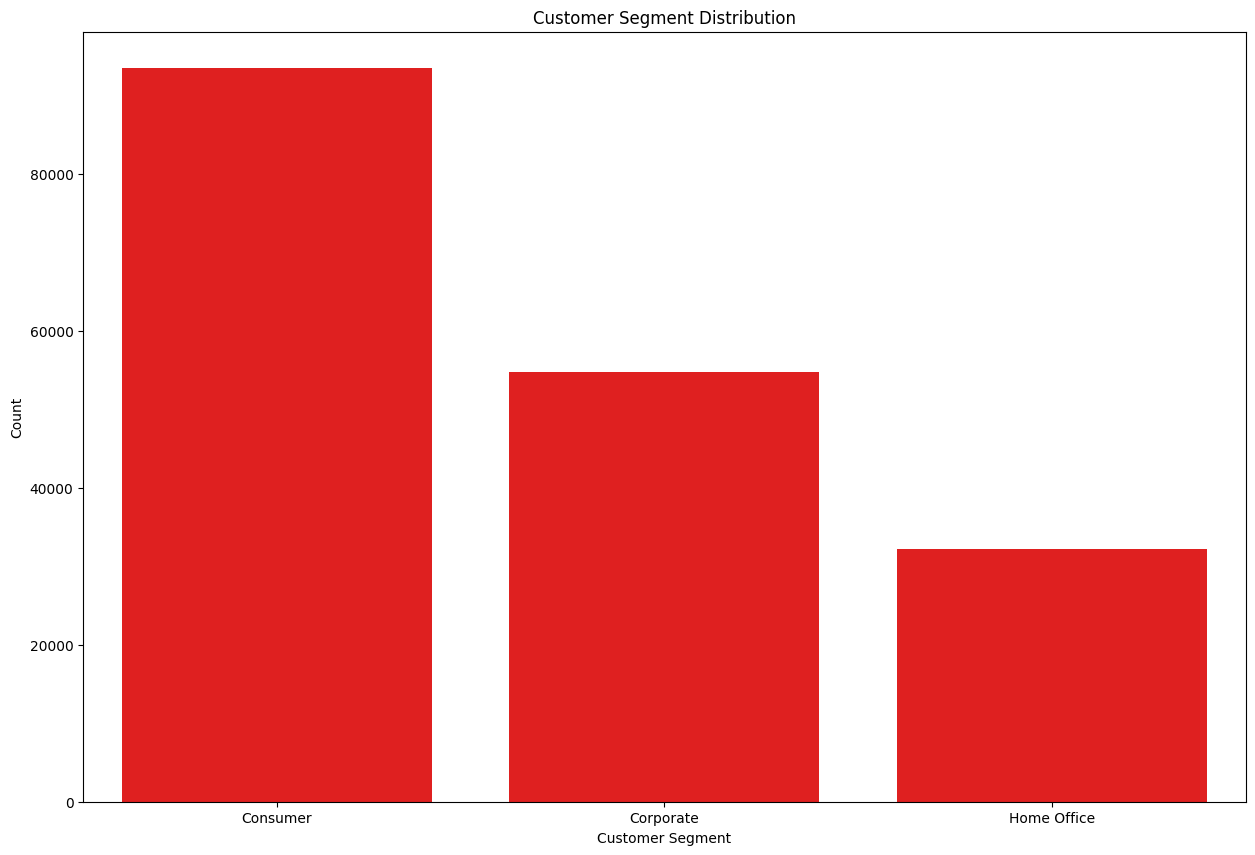

In [172]:
customer_segment_counts = supply['Customer Segment'].value_counts()
market_counts = supply['Market'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values, color='red')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()


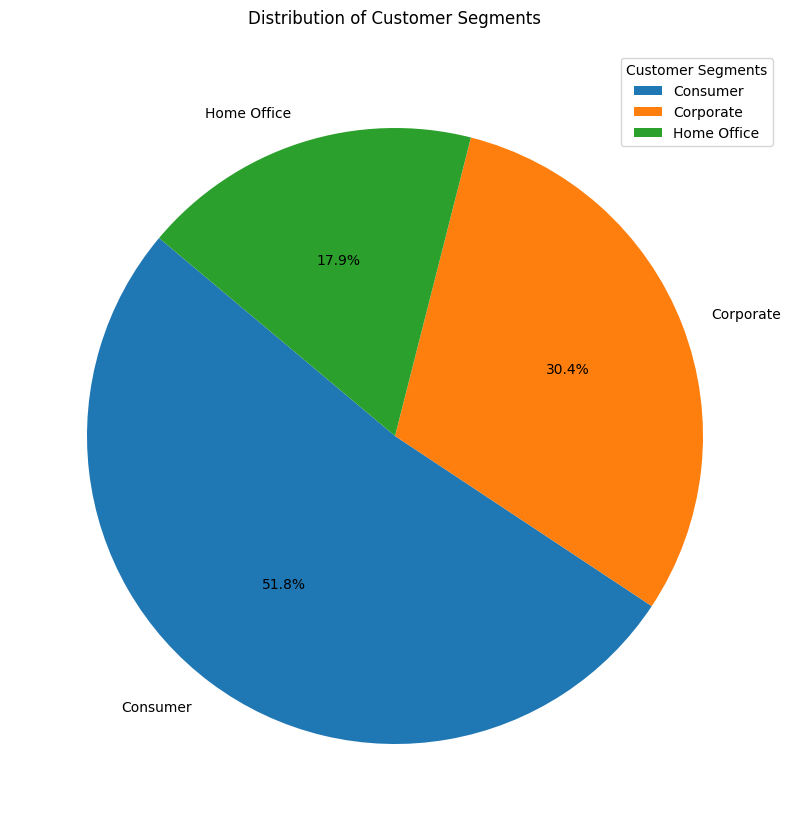

In [173]:
plt.figure(figsize=(15, 10))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='center', pad=20)
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

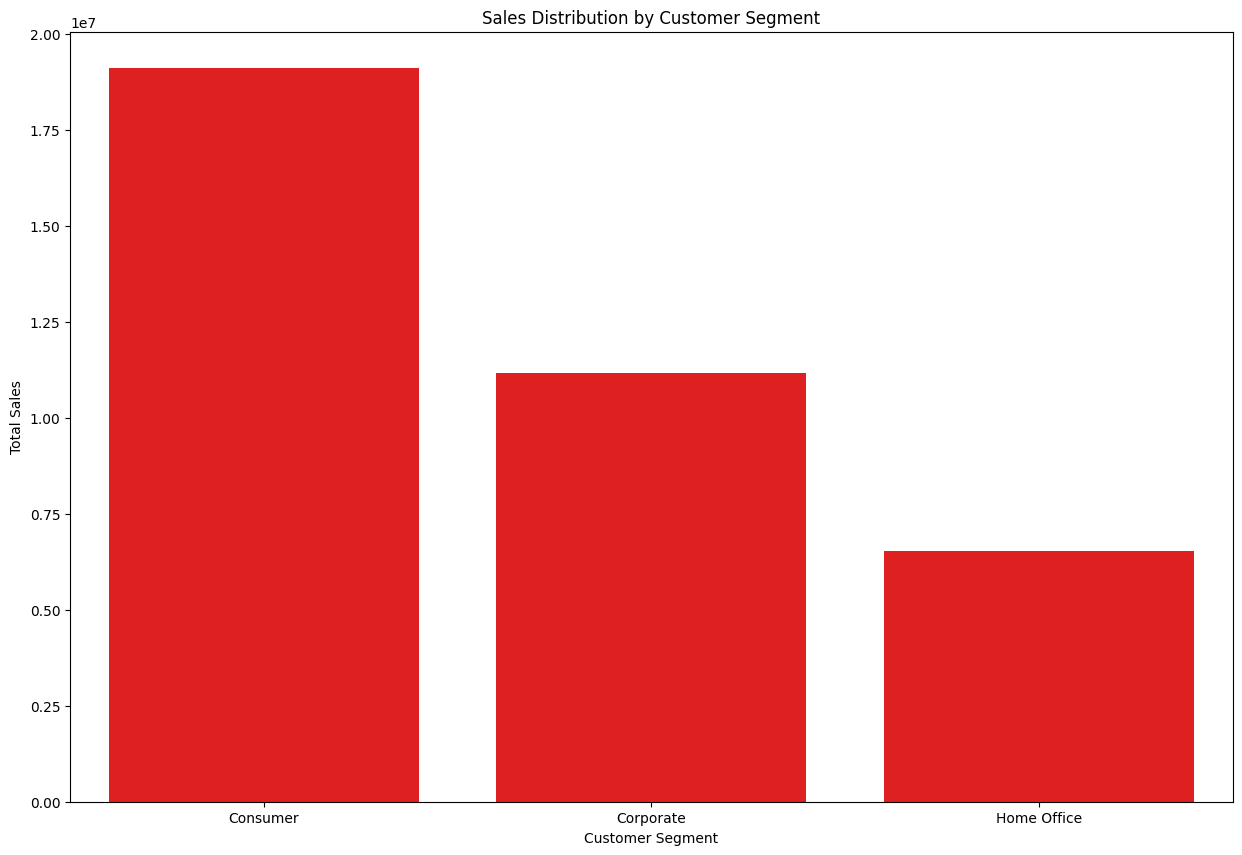

In [174]:
segment_sales = supply.groupby('Customer Segment')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=segment_sales.index, y=segment_sales.values, color='red')
plt.title('Sales Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()


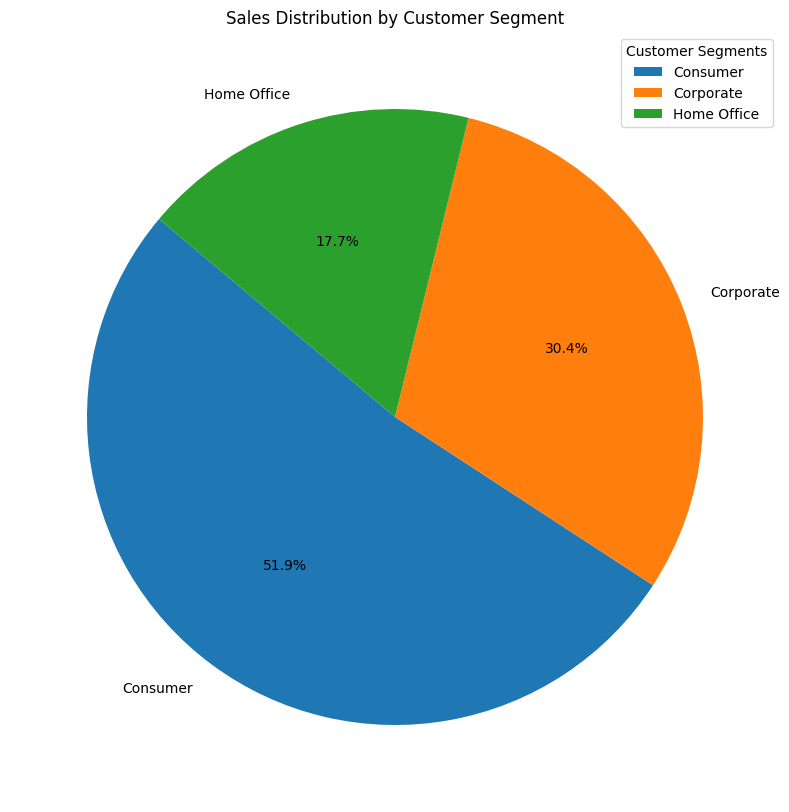

In [175]:
plt.figure(figsize=(15, 10))
plt.pie(segment_sales, labels=segment_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Customer Segment')
plt.legend(segment_sales.index, title='Customer Segments', loc='best')
plt.show()

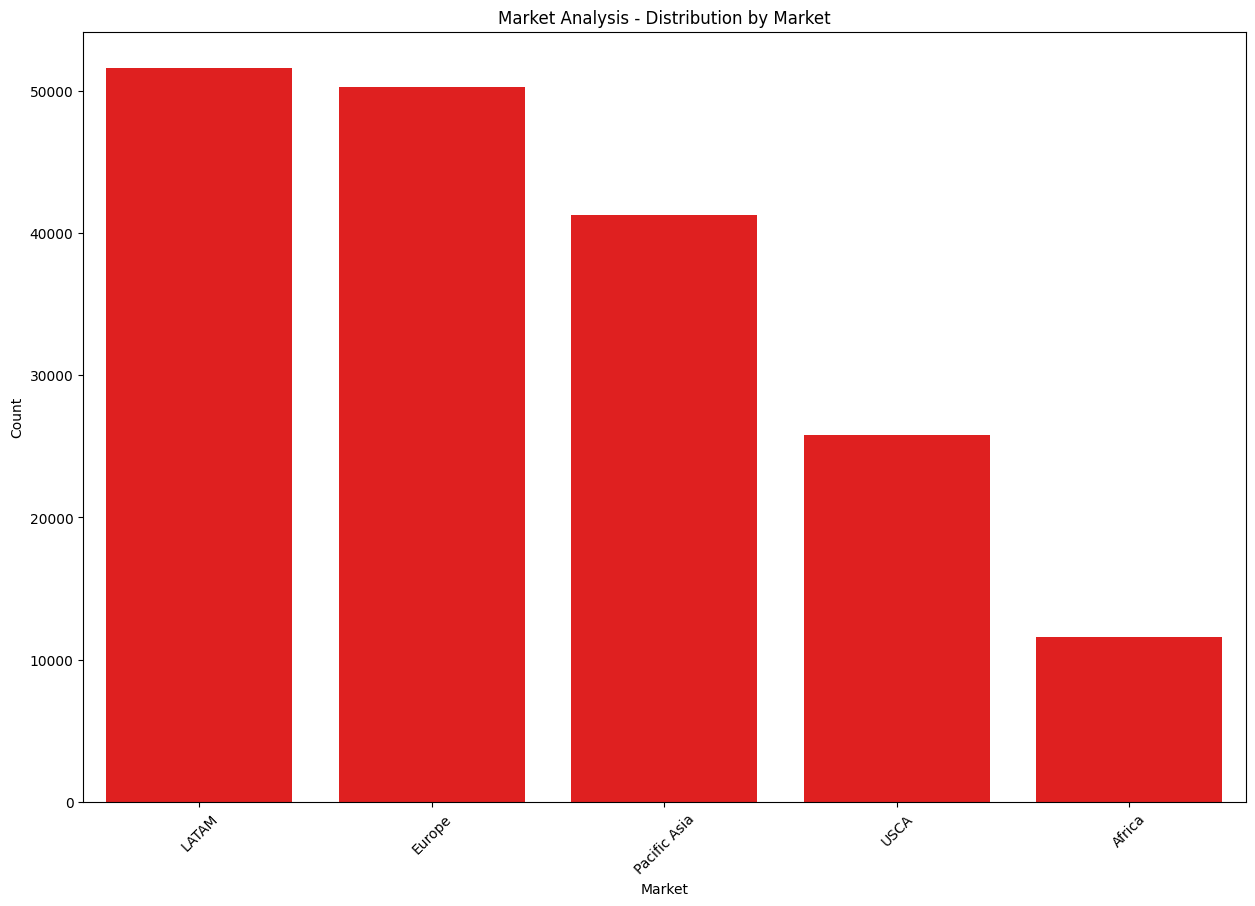

In [176]:
plt.figure(figsize=(15, 10))
sns.barplot(x=market_counts.index, y=market_counts.values, color='red')
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

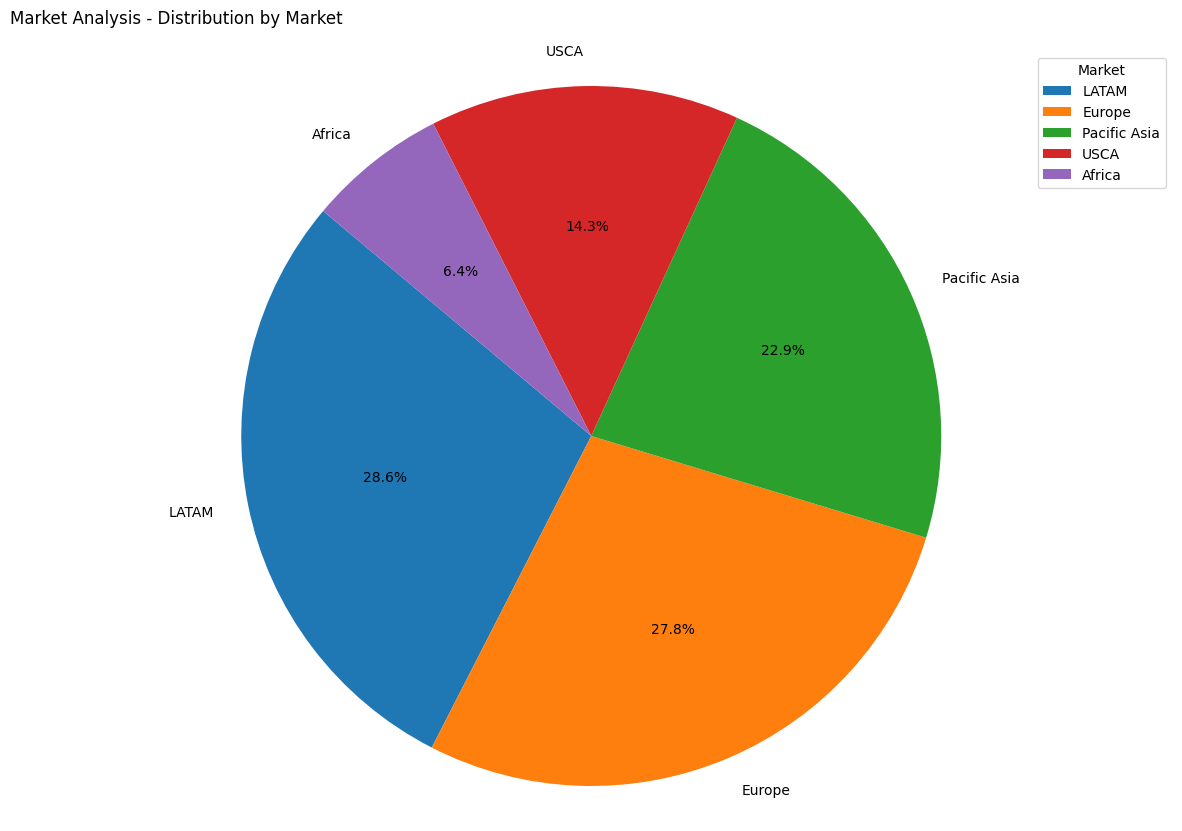

In [177]:
plt.figure(figsize=(15, 10))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()

In [178]:
market_counts

,count
Market,
LATAM,51594
Europe,50252
Pacific Asia,41260
USCA,25799
Africa,11614


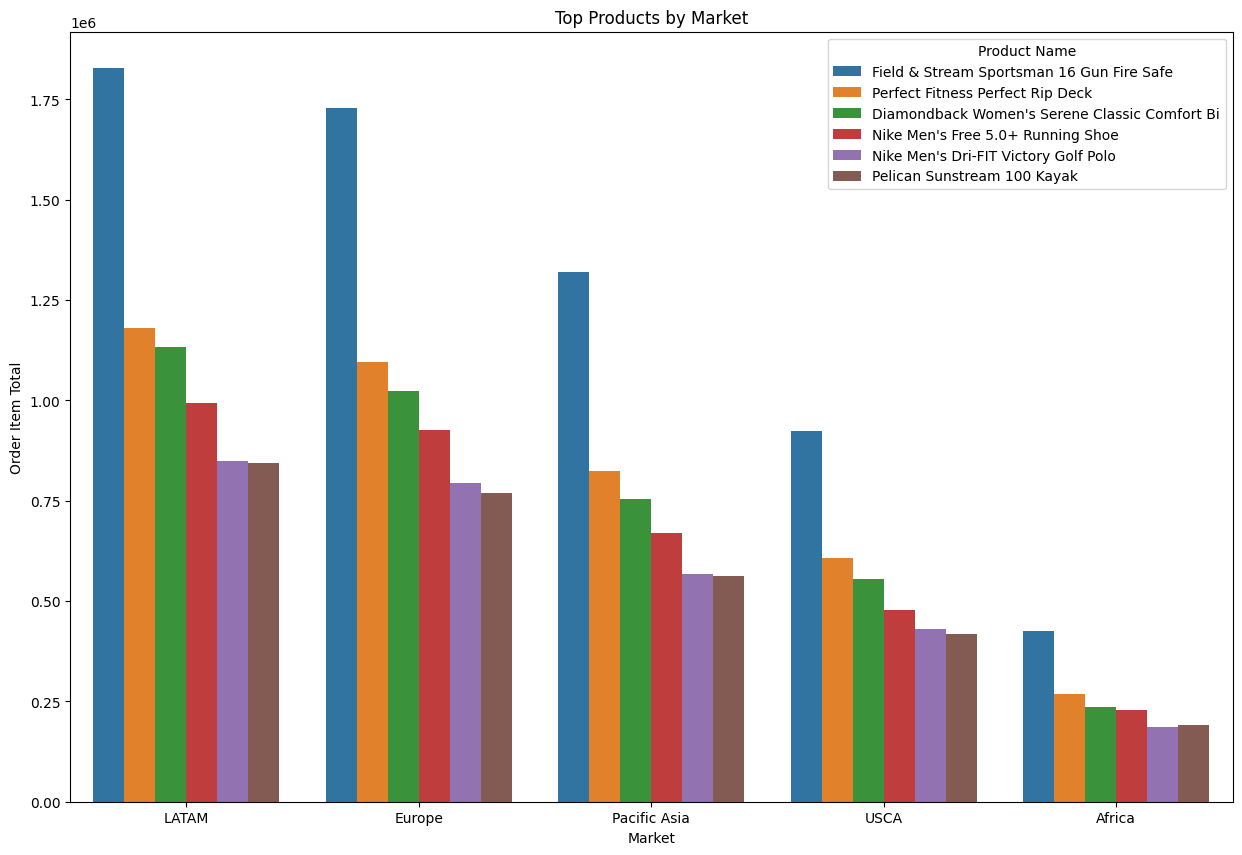

In [179]:
top_products = supply.groupby(['Market', 'Product Name'])['Order Item Total'].sum().reset_index()
top_products = top_products.sort_values('Order Item Total', ascending=False).groupby('Market').head(6)

plt.figure(figsize=(15, 10))
sns.barplot(data=top_products, x='Market', y='Order Item Total', hue='Product Name')
plt.title('Top Products by Market')
plt.show()

<ipython-input-180-39ae5044a5a8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=supply, x='Delivery Status', order=delivery_counts.index, palette='Set3')


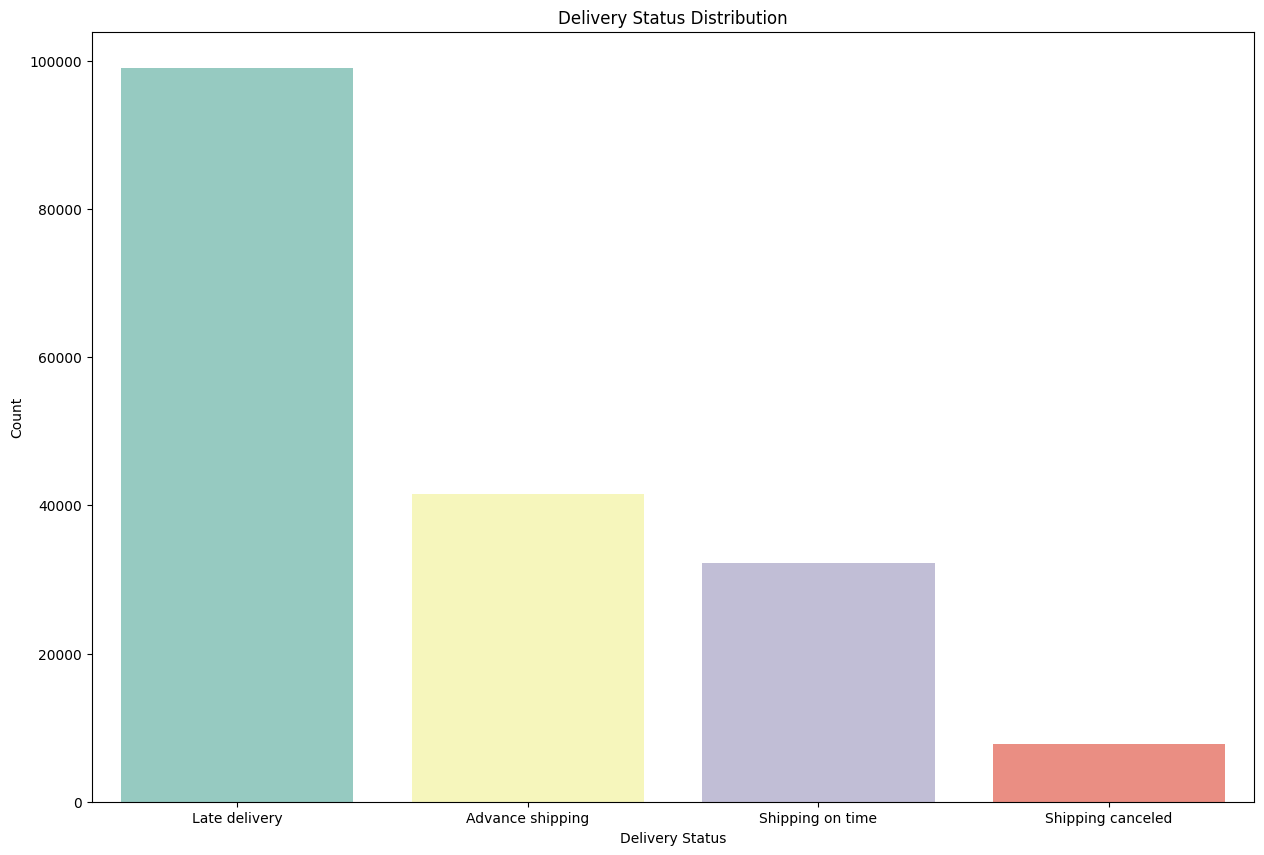

Delivery Status Summary:
Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


In [180]:
delivery_status_data = supply['Delivery Status']

#distribution
delivery_counts = delivery_status_data.value_counts()

plt.figure(figsize=(15, 10))
sns.countplot(data=supply, x='Delivery Status', order=delivery_counts.index, palette='Set3')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

#summary statistics
print("Delivery Status Summary:")
print(delivery_counts)

<Figure size 1200x800 with 0 Axes>

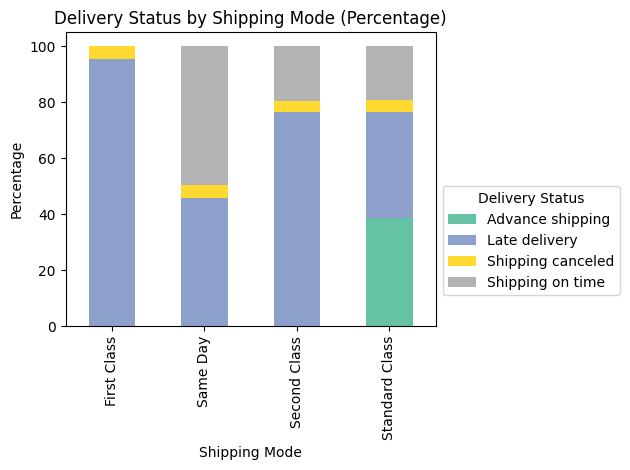

Cross-Tabulation (Contingency Table) with Percentages:
Delivery Status  Advance shipping  Late delivery  Shipping canceled  \
Shipping Mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

Delivery Status  Shipping on time  
Shipping Mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


In [181]:
late_deliveries = supply[supply['Delivery Status'] == 'Late delivery']
delivery_status_data = supply['Delivery Status']
shipping_mode_data = supply['Shipping Mode']

cross_table = pd.crosstab(shipping_mode_data, delivery_status_data)

#row percentages
cross_table_percent = cross_table.div(cross_table.sum(1), axis=0) * 100

plt.figure(figsize=(12, 8))
cross_table_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')
plt.legend(title='Delivery Status', loc='upper left',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

#cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_table_percent)

In [182]:
print("Total Sales by Market:")
print(supply.groupby('Market')['Sales'].sum())

Total Sales by Market:
Market
Africa          2.294453e+06
Europe          1.087240e+07
LATAM           1.027761e+07
Pacific Asia    8.273744e+06
USCA            5.066529e+06
Name: Sales, dtype: float64


In [183]:
supply['order date (DateOrders)'] = pd.to_datetime(supply['order date (DateOrders)'], errors='coerce', dayfirst=True)

<ipython-input-183-1b189282354f>:1: UserWarning: Parsing dates in %m/%d/%Y %H:%M format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  supply['order date (DateOrders)'] = pd.to_datetime(supply['order date (DateOrders)'], errors='coerce', dayfirst=True)


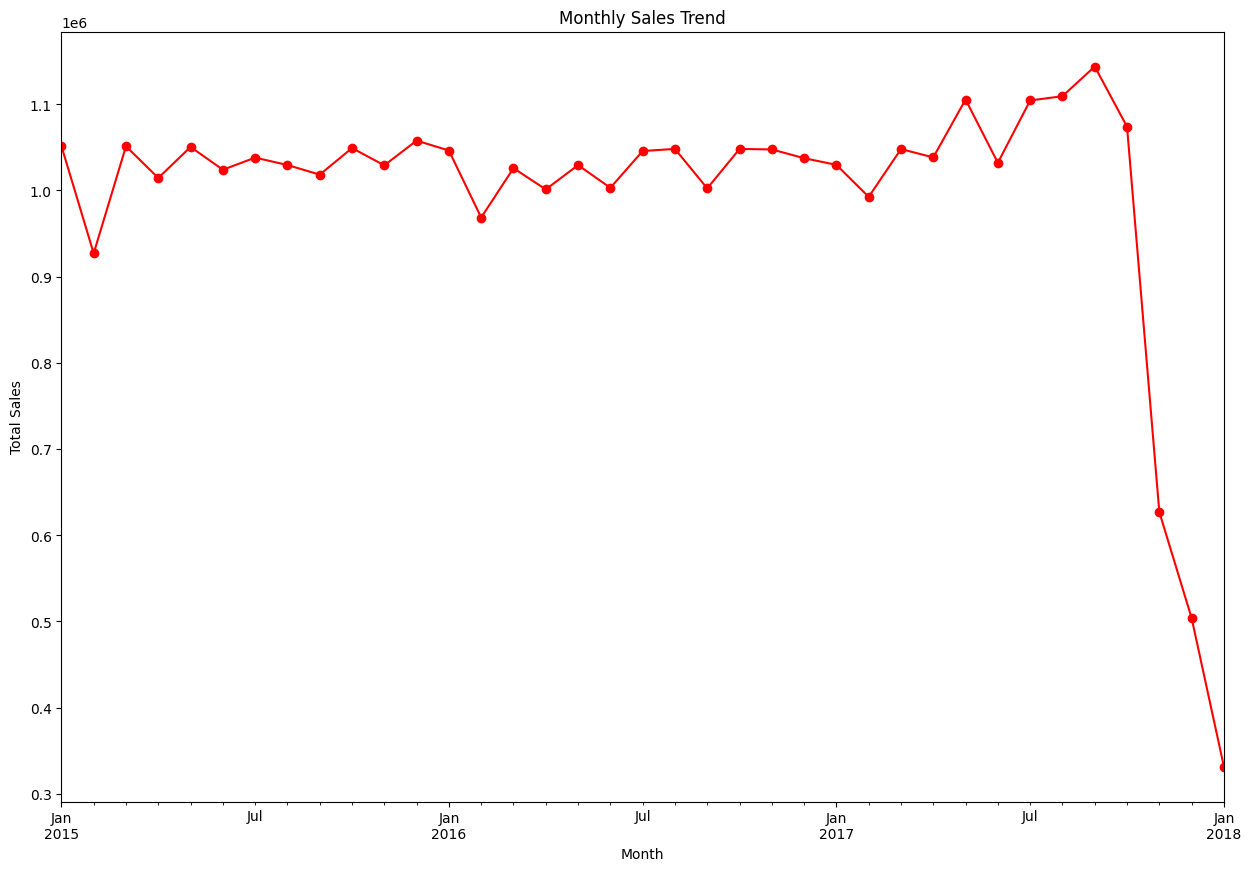

In [184]:
monthly_sales = supply.resample('M', on='order date (DateOrders)')['Sales'].sum()
plt.figure(figsize=(15, 10))
monthly_sales.plot(kind='line', marker='o', color='red')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [185]:
smdf = supply[supply['Product Name'] == "Nike Men's Free 5.0+ Running Shoe"]

In [186]:
smdf

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
59,PAYMENT,2,2,-184.779999,263.970001,Shipping on time,0,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,10/6/2016 22:55,Second Class
63,PAYMENT,3,2,129.350006,293.970001,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,7/10/2015 5:31,Second Class
64,PAYMENT,2,2,132.289993,269.970001,Shipping on time,0,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,7/24/2017 7:16,Second Class
65,PAYMENT,6,2,76.040001,224.979996,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,8/13/2017 6:33,Second Class
74,PAYMENT,6,2,101.389999,299.970001,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/3/2015 0:55,Second Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179604,TRANSFER,5,4,-33.750000,449.959992,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/5/2017 1:39,Standard Class
179605,TRANSFER,2,4,141.360001,434.959992,Advance shipping,0,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,2/12/2017 6:27,Standard Class
179606,TRANSFER,3,4,188.979996,419.959992,Advance shipping,0,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,6/16/2017 2:57,Standard Class
179607,TRANSFER,5,4,111.989998,399.959992,Late delivery,1,9,Cardio Equipment,Caguas,...,NaN,191,9,NaN,http://images.acmesports.sports/Nike+Men%27s+F...,Nike Men's Free 5.0+ Running Shoe,99.989998,0,4/19/2015 5:59,Standard Class


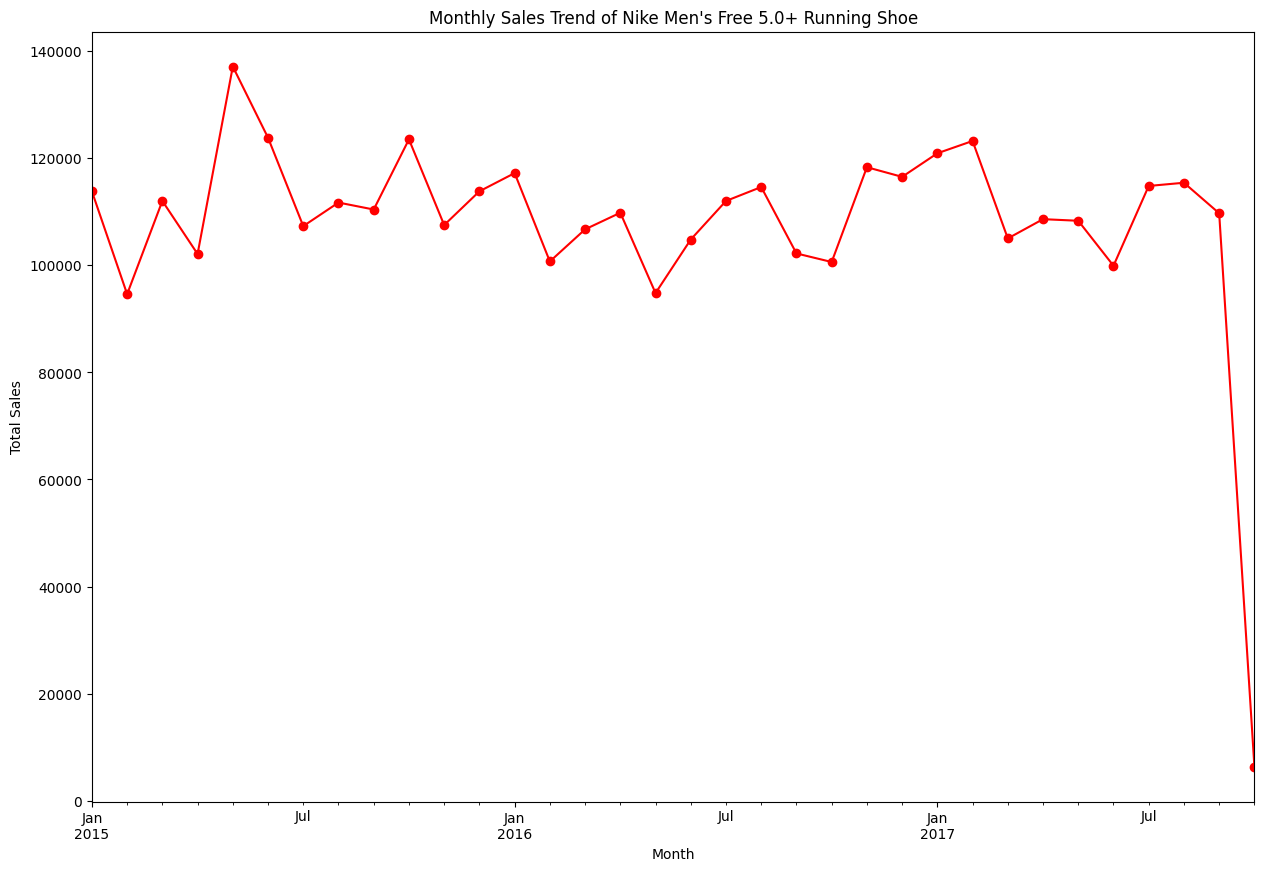

In [187]:
monthly_sales1 = smdf.resample('M', on='order date (DateOrders)')['Sales'].sum()
plt.figure(figsize=(15, 10))
monthly_sales1.plot(kind='line', marker='o', color='red')
plt.title("Monthly Sales Trend of Nike Men's Free 5.0+ Running Shoe")
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#Market and Customer Segment Interactions

<ipython-input-188-60ea485097f3>:23: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Reds), label='Node Degree')


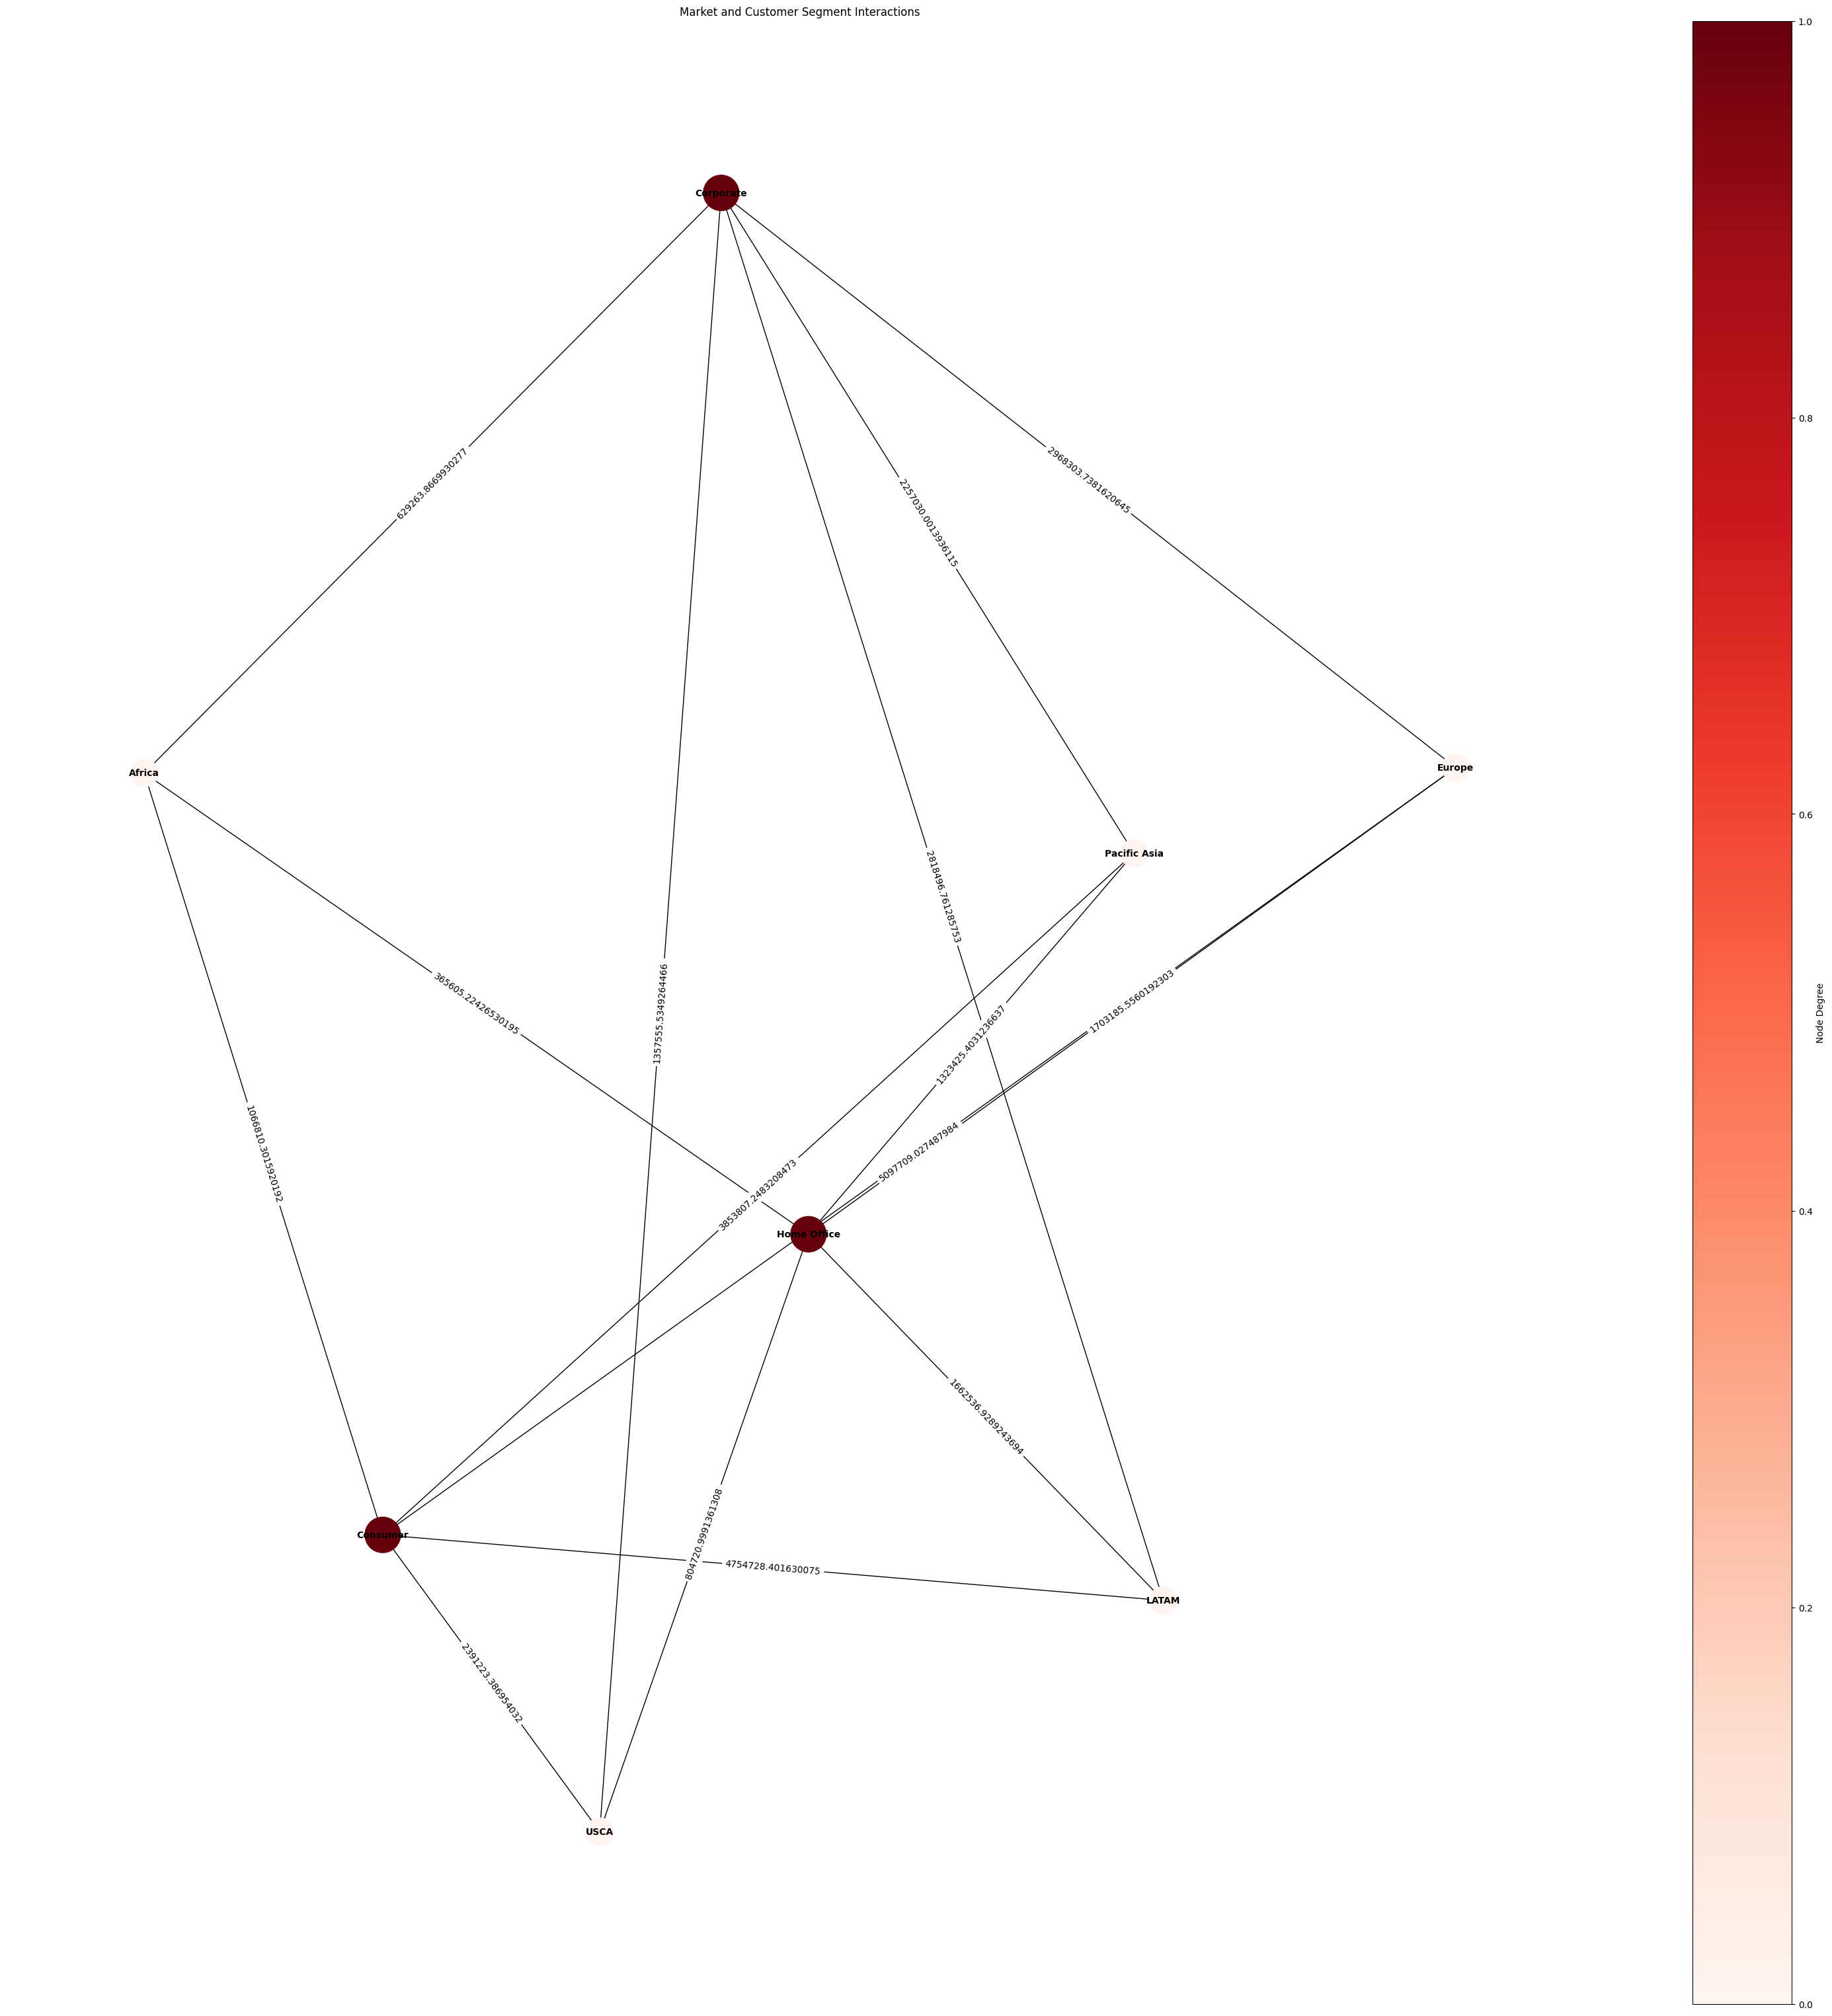

In [188]:
import networkx as nx
Gmarkseg = nx.Graph()
for _, df in supply.iterrows():
  market = df['Market']
  segment = df['Customer Segment']
  weight = df['Order Item Total']
  if Gmarkseg.has_edge(market, segment):
    Gmarkseg[market][segment]['weight'] += weight
  else:
    Gmarkseg.add_edge(market, segment, weight=weight)
pos = nx.spring_layout(Gmarkseg, seed=3, weight='weight')

#node size based on degrees of a node
node_sizes = [300 * Gmarkseg.degree(n) for n in Gmarkseg.nodes()]
node_colors = [Gmarkseg.degree(n) for n in Gmarkseg.nodes()]
plt.figure(figsize=(30,30))
nx.draw(Gmarkseg, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Reds, font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(Gmarkseg, 'weight')
nx.draw_networkx_edge_labels(Gmarkseg, pos, edge_labels=edge_labels)

plt.title('Market and Customer Segment Interactions')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Reds), label='Node Degree')
plt.show()


In [189]:
for a, b, c in Gmarkseg.edges(data=True):
    print(f"Market: {a}, Customer Segment: {b}, Total Sales: {c['weight']}")

Market: Pacific Asia, Customer Segment: Consumer, Total Sales: 3853807.2483208473
Market: Pacific Asia, Customer Segment: Home Office, Total Sales: 1323425.4031236637
Market: Pacific Asia, Customer Segment: Corporate, Total Sales: 2257030.0013936115
Market: Consumer, Customer Segment: LATAM, Total Sales: 4754728.401630075
Market: Consumer, Customer Segment: Africa, Total Sales: 1066810.3015920192
Market: Consumer, Customer Segment: Europe, Total Sales: 5097709.027487984
Market: Consumer, Customer Segment: USCA, Total Sales: 2391223.386954032
Market: Home Office, Customer Segment: USCA, Total Sales: 804720.9991361308
Market: Home Office, Customer Segment: Africa, Total Sales: 365605.22426530195
Market: Home Office, Customer Segment: Europe, Total Sales: 1703185.5560192303
Market: Home Office, Customer Segment: LATAM, Total Sales: 1662536.9289243694
Market: Corporate, Customer Segment: LATAM, Total Sales: 2818496.761285753
Market: Corporate, Customer Segment: Africa, Total Sales: 629263.

In [190]:
supply.columns = [col.lower().replace(' ', '_') for col in supply.columns]
supply.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
supply.drop(columns=["customer_email", "customer_fname", "customer_lname", "customer_password", "latitude", "longitude", "product_description", "product_image"], inplace=True)
supply["shipping_date_dateorders"] = pd.to_datetime(supply["shipping_date_dateorders"])
supply["shipping_year"] = supply["shipping_date_dateorders"].dt.year
supply["shipping_day"] = supply["shipping_date_dateorders"].dt.day_name()
supply["shipping_hour"] = supply["shipping_date_dateorders"].dt.hour
supply["late_days"] = supply.days_for_shipping_real - supply.days_for_shipment_scheduled

In [191]:
##Comparing performance between shipping modes
##Same Day: Shipping on Same Day
##First Class: Shipping within 1 Day
##Second Class: Shipping within 3 Days
##Standard Class: Shipping within 6 Days
total = supply.groupby("shipping_mode", as_index = False).agg(count = ("shipping_mode", "count"))
total

ship_mode = supply.groupby(["shipping_mode", "delivery_status"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))

ship_mode = ship_mode.merge(total, on = "shipping_mode", how = "left")
ship_mode.rename(columns={'count': 'total_number'}, inplace=True)
ship_mode["percentage"] = ship_mode.number/ship_mode.total_number*100

x = ["First Class", "Same Day", "Second Class", "Standard Class"]
for y in x:
    mask = ship_mode[ship_mode["shipping_mode"] == y]
    mask = mask.pivot(index='shipping_mode', columns='delivery_status', values=['percentage'])
    exec(f"{y.lower().replace(' ', '_')} = mask")

ship_mode_graph = pd.concat([first_class, second_class, standard_class, same_day])

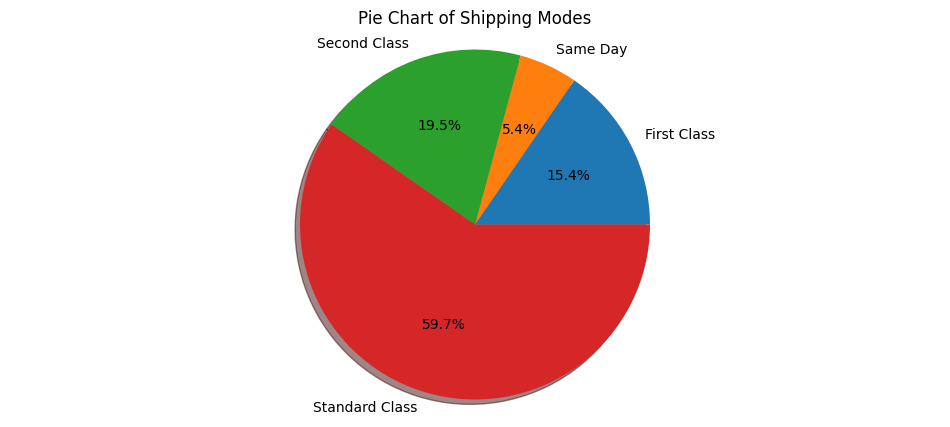

In [192]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))
x = total["shipping_mode"]
y = total["count"]
ax1.pie(y,labels=x,  autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
ax1.set_title('Pie Chart of Shipping Modes')
plt.show()

[Text(0, 0, 'Apparel'),
 Text(1, 0, 'Book Shop'),
 Text(2, 0, 'Discs Shop'),
 Text(3, 0, 'Fan Shop'),
 Text(4, 0, 'Fitness'),
 Text(5, 0, 'Footwear'),
 Text(6, 0, 'Golf'),
 Text(7, 0, 'Health and Beauty '),
 Text(8, 0, 'Outdoors'),
 Text(9, 0, 'Pet Shop'),
 Text(10, 0, 'Technology')]

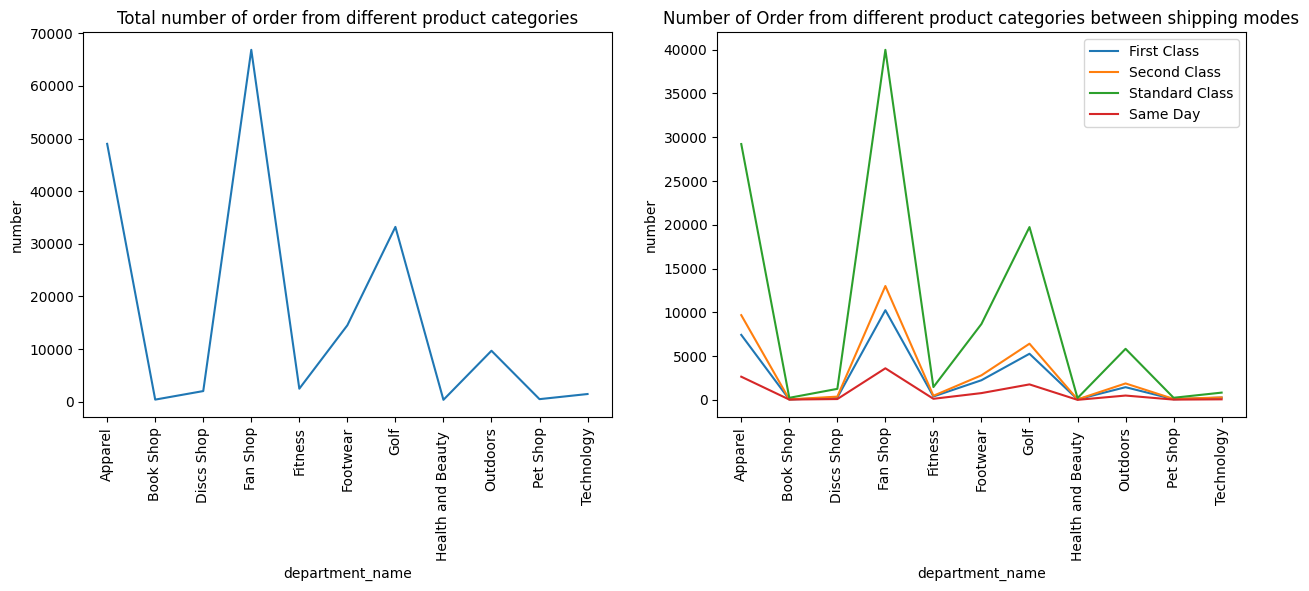

In [193]:
first_class_department = supply[supply["shipping_mode"] == "First Class"]
first_class_department = first_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
second_class_department = supply[supply["shipping_mode"] == "Second Class"]
second_class_department = second_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
standard_class_department = supply[supply["shipping_mode"] == "Standard Class"]
standard_class_department = standard_class_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
same_day_department = supply[supply["shipping_mode"] == "Same Day"]
same_day_department = same_day_department.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
department = supply.groupby(["department_name"], as_index = False).agg(number = ("delivery_status", "count"),  late_delivery_risk = ("late_delivery_risk", "mean"), actual_days_for_shipping = ("days_for_shipping_real", "mean"), scheduled_days_for_shipping = ("days_for_shipment_scheduled", "mean"), total_item = ("order_item_quantity", "mean"), late_days = ("late_days", "mean"))
sns.lineplot(x =department["department_name"], y = department["number"], ax=ax1)
ax1.set_title("Total number of order from different product categories")
ax1.set_xticks(range(len(department["department_name"])))
ax1.set_xticklabels(department["department_name"], rotation=90)

sns.lineplot(x = first_class_department['department_name'], y = first_class_department['number'], label='First Class', ax=ax2)
sns.lineplot(x = second_class_department['department_name'], y = second_class_department['number'], label='Second Class', ax=ax2)
sns.lineplot(x = standard_class_department['department_name'], y = standard_class_department['number'], label='Standard Class', ax=ax2)
sns.lineplot(x = same_day_department['department_name'], y = same_day_department['number'], label='Same Day', ax=ax2)
ax2.set_title("Number of Order from different product categories between shipping modes")
ax2.set_xticks(range(len(department["department_name"])))
ax2.set_xticklabels(department["department_name"], rotation=90)

In [194]:
supply.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'customer_street', 'customer_zipcode', 'department_id',
       'department_name', 'market', 'order_city', 'order_country',
       'order_customer_id', 'order_date_dateorders', 'order_id',
       'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'order_zipcode', 'product_card_id',
       'product_category_id', 'product_name', 'product_price',
       'product_status', 'shipping_date_dateorders', 'shipping_mode',
       'shipping_year', 'shi

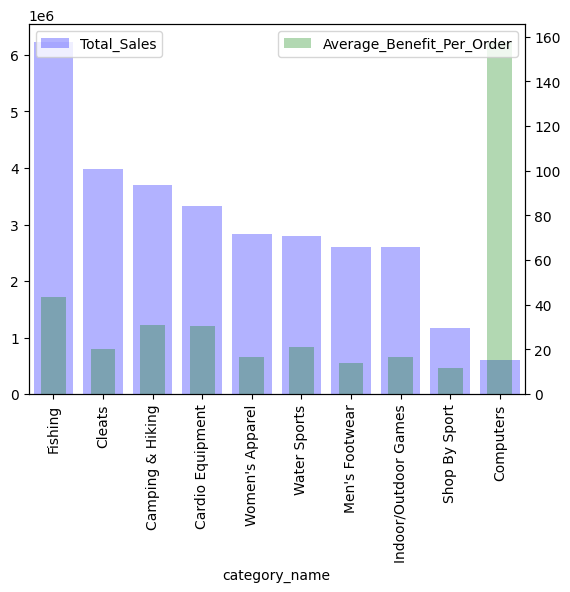

In [195]:
#What is the relationship between product category and sales performance?¶
category_performance = supply.groupby('category_name').agg(
    Total_Sales=('sales_per_customer', 'sum'),
    Average_Benefit_Per_Order=('benefit_per_order', 'mean')
)

category_performance = category_performance.sort_values(by='Total_Sales', ascending=False)
ax1 = category_performance.Total_Sales.head(10).plot(kind='bar', width=0.8, color='blue', alpha=0.3)
ax2 = ax1.twinx()
category_performance.Average_Benefit_Per_Order.head(10).plot(kind='bar', color='green', width=0.5, alpha=0.3, ax=ax2)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

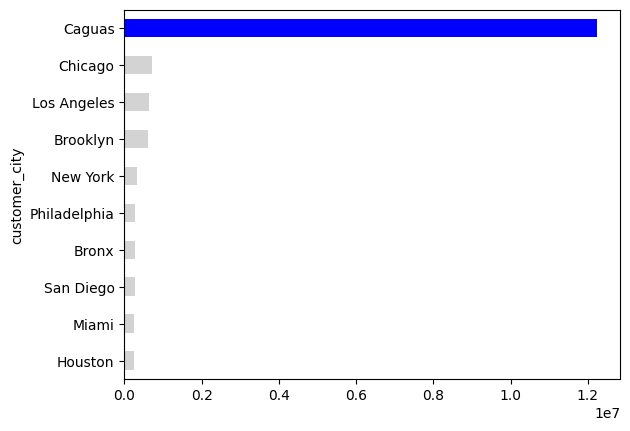

In [202]:
#cities having the highest sales
ax = supply.groupby('customer_city').sales_per_customer.sum().sort_values(ascending=False).head(10).sort_values().plot(kind='barh', color='lightgray')
bars = ax.patches
bars[-1].set_facecolor('blue')

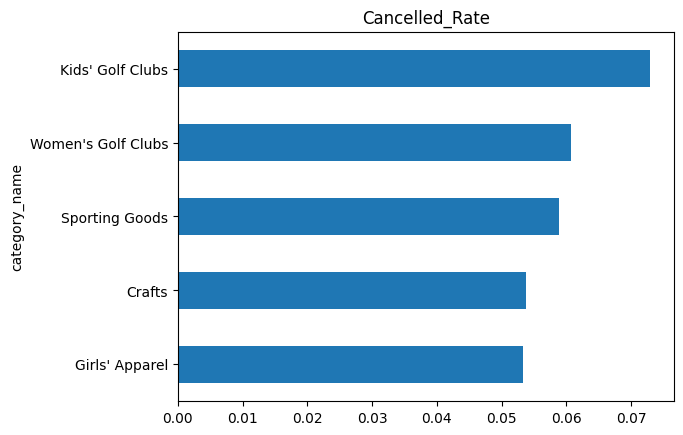

In [197]:
#the rate of cancellation across product categories
group = supply.groupby(['category_name','delivery_status']).category_name.count().unstack()
group['Total'] = group.sum(axis=1)
group['Canceled_Rate'] = group['Shipping canceled'] / group.Total
ax = group.Canceled_Rate.sort_values(ascending=False).head().plot(kind='barh', title='Cancelled_Rate')
ax.invert_yaxis()

<Axes: xlabel='Days_For_Shipping_Real', ylabel='shipping_mode'>

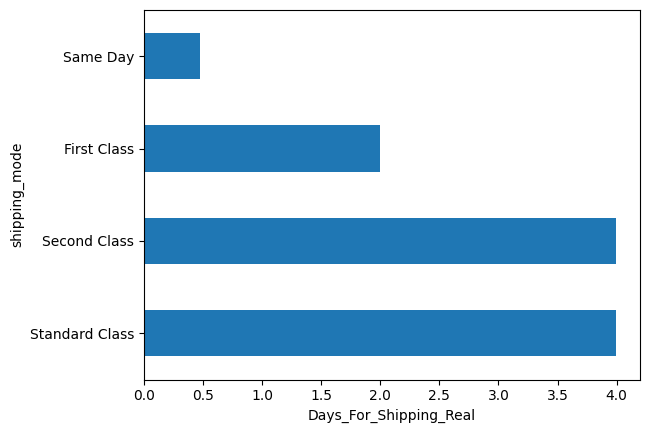

In [198]:
#shipping performance
supply.groupby('shipping_mode').days_for_shipping_real.mean().sort_values(ascending=False).plot(kind='barh', xlabel='Days_For_Shipping_Real')

In [199]:
train_df = supply.copy()
train_df = train_df.drop(['product_status'
,'customer_street'
,'order_zipcode'
,'order_date_dateorders'
,'shipping_day'
,'shipping_date_dateorders'], axis=1)
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import tensorflow as tf
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve

In [200]:
data = supply.dropna()
# Feature Selection
features = ['days_for_shipping_real', 'days_for_shipment_scheduled', 'benefit_per_order',
            'sales_per_customer', 'order_item_discount_rate', 'order_item_product_price',
            'order_item_quantity', 'order_item_total', 'order_profit_per_order',
            'product_price', 'shipping_year', 'shipping_day', 'shipping_hour', 'late_days']
X = data[features]
y = data['late_delivery_risk']

# Convert categorical features to numerical
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model Evaluation
y_pred = rf_model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.976784755770263
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3266
           1       0.96      1.00      0.98      4186

    accuracy                           0.98      7452
   macro avg       0.98      0.97      0.98      7452
weighted avg       0.98      0.98      0.98      7452



In [201]:
test_samples = pd.DataFrame({
    'days_for_shipping_real': [3, 5, 7, 2, 6],
    'days_for_shipment_scheduled': [4, 6, 8, 3, 5],
    'benefit_per_order': [10, 20, 15, 12, 18],
    'sales_per_customer': [200, 300, 250, 220, 280],
    'order_item_discount_rate': [0.1, 0.2, 0.15, 0.1, 0.25],
    'order_item_product_price': [30, 40, 35, 25, 45],
    'order_item_quantity': [2, 3, 1, 4, 2],
    'order_item_total': [60, 120, 35, 100, 90],
    'order_profit_per_order': [5, 10, 7, 6, 8],
    'product_price': [50, 60, 55, 45, 65],
    'shipping_year': [2023, 2023, 2024, 2023, 2024],
    'shipping_day': [15, 20, 25, 10, 22],
    'shipping_hour': [10, 14, 18, 9, 16],
    'late_days': [2, 0, 1, 3, 1]
})

# Categorical features to numerical
test_samples = pd.get_dummies(test_samples)


test_samples = test_samples.reindex(columns=X.columns, fill_value=0)
predictions = rf_model.predict(test_samples)

print("Predictions for the 5 test samples:")
for i, prediction in enumerate(predictions, start=1):
    print(f"Sample {i}: {'Late Delivery Risk' if prediction else 'No Late Delivery Risk'}")

Predictions for the 5 test samples:
Sample 1: Late Delivery Risk
Sample 2: No Late Delivery Risk
Sample 3: Late Delivery Risk
Sample 4: Late Delivery Risk
Sample 5: Late Delivery Risk
